In [6]:
# 06_model_optimization.ipynb

import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

plt.style.use("default")

# ---- Load preprocessed data and preprocessor ----
artifacts = joblib.load("../Dataset/preprocessed_artifacts.pkl")

X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]
preprocessor = artifacts["preprocessor"]

X_train.shape, X_test.shape


((80000, 27), (20000, 27))

In [7]:
def evaluate_model(name, model, X_test, y_test):
    """Return a dict with key metrics and print a report."""
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("F1 (macro):", f1_macro)
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return {
        "model": name,
        "accuracy": acc,
        "f1_macro": f1_macro,
    }


In [8]:
# ---- Logistic Regression: pipeline + param grid ----

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="auto")

pipe_logreg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", log_reg),
    ]
)

param_grid_logreg = {
    "model__C": [0.01, 0.1, 1.0, 10.0],
    "model__class_weight": [None, "balanced"],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logreg = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=param_grid_logreg,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
)

grid_logreg.fit(X_train, y_train)

print("Best params (LogReg):", grid_logreg.best_params_)
print("Best CV F1-macro (LogReg):", grid_logreg.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/minif

[CV] END ........model__C=0.01, model__class_weight=balanced; total time=   5.1s
[CV] END ........model__C=0.01, model__class_weight=balanced; total time=   5.3s
[CV] END ........model__C=0.01, model__class_weight=balanced; total time=   5.4s
[CV] END ........model__C=0.01, model__class_weight=balanced; total time=   6.0s
[CV] END ........model__C=0.01, model__class_weight=balanced; total time=   6.0s
[CV] END ............model__C=0.01, model__class_weight=None; total time=   6.1s
[CV] END ............model__C=0.01, model__class_weight=None; total time=   6.2s
[CV] END ............model__C=0.01, model__class_weight=None; total time=   6.2s
[CV] END ............model__C=0.01, model__class_weight=None; total time=   6.4s
[CV] END ............model__C=0.01, model__class_weight=None; total time=   6.5s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/minif

[CV] END .............model__C=0.1, model__class_weight=None; total time=  12.8s
[CV] END .............model__C=0.1, model__class_weight=None; total time=  13.0s
[CV] END .............model__C=0.1, model__class_weight=None; total time=  13.0s
[CV] END .............model__C=0.1, model__class_weight=None; total time=  13.1s
[CV] END .............model__C=0.1, model__class_weight=None; total time=  13.3s
[CV] END .........model__C=0.1, model__class_weight=balanced; total time=  13.6s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/minif

[CV] END .........model__C=0.1, model__class_weight=balanced; total time=  13.1s
[CV] END .........model__C=0.1, model__class_weight=balanced; total time=  13.3s
[CV] END .........model__C=0.1, model__class_weight=balanced; total time=  13.2s
[CV] END .........model__C=0.1, model__class_weight=balanced; total time=  13.9s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/minif

[CV] END .............model__C=1.0, model__class_weight=None; total time=  22.6s
[CV] END .............model__C=1.0, model__class_weight=None; total time=  23.2s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV] END .............model__C=1.0, model__class_weight=None; total time=  24.1s
[CV] END .............model__C=1.0, model__class_weight=None; total time=  24.0s
[CV] END .........model__C=1.0, model__class_weight=balanced; total time=  23.8s
[CV] END .............model__C=1.0, model__class_weight=None; total time=  24.1s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV] END .........model__C=1.0, model__class_weight=balanced; total time=  21.3s
[CV] END .........model__C=1.0, model__class_weight=balanced; total time=  21.2s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[CV] END .........model__C=1.0, model__class_weight=balanced; total time=  22.0s
[CV] END .........model__C=1.0, model__class_weight=balanced; total time=  22.4s
[CV] END ............model__C=10.0, model__class_weight=None; total time=  25.1s
[CV] END ............model__C=10.0, model__class_weight=None; total time=  26.3s
[CV] END ........model__C=10.0, model__class_weight=balanced; total time=  22.1s
[CV] END ............model__C=10.0, model__class_weight=None; total time=  23.4s
[CV] END ............model__C=10.0, model__class_weight=None; total time=  24.0s
[CV] END ............model__C=10.0, model__class_weight=None; total time=  25.0s
[CV] END ........model__C=10.0, model__class_weight=balanced; total time=  17.9s
[CV] END ........model__C=10.0, model__class_weight=balanced; total time=  17.6s
[CV] END ........model__C=10.0, model__class_weight=balanced; total time=  17.9s
[CV] END ........model__C=10.0, model__class_weight=balanced; total time=  15.7s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params (LogReg): {'model__C': 1.0, 'model__class_weight': 'balanced'}
Best CV F1-macro (LogReg): 0.7953132655294073


=== Logistic Regression (tuned) ===
Accuracy: 0.80525
F1 (macro): 0.8019993819723336

Classification report:

              precision    recall  f1-score   support

        Good       0.74      0.84      0.78      3566
        Poor       0.77      0.86      0.81      5799
    Standard       0.86      0.76      0.81     10635

    accuracy                           0.81     20000
   macro avg       0.79      0.82      0.80     20000
weighted avg       0.81      0.81      0.81     20000



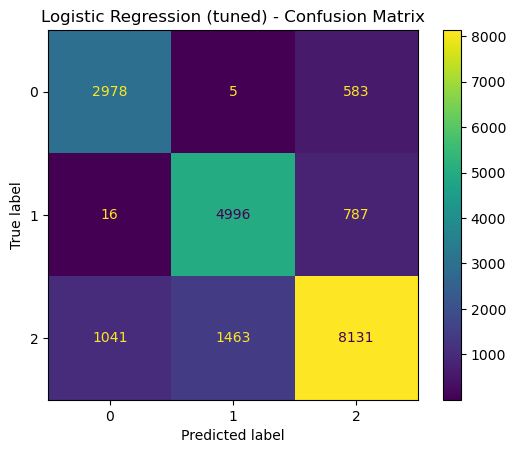

In [9]:
# ---- Evaluate best Logistic Regression on test set ----
best_logreg = grid_logreg.best_estimator_
logreg_results = evaluate_model("Logistic Regression (tuned)", best_logreg, X_test, y_test)


In [10]:
from sklearn.tree import DecisionTreeClassifier

# ---- Decision Tree: pipeline + param grid ----

tree_base = DecisionTreeClassifier(random_state=42)

pipe_tree = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", tree_base),
    ]
)

param_grid_tree = {
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ["gini", "entropy"],
}

grid_tree = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid_tree,
    scoring="f1_macro",
    cv=cv,                 # same StratifiedKFold as before
    n_jobs=-1,
    verbose=2,
)

grid_tree.fit(X_train, y_train)

print("Best params (Decision Tree):", grid_tree.best_params_)
print("Best CV F1-macro (Tree):", grid_tree.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2; total time=  23.9s


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=  25.9s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5; total time=  26.3s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=  27.1s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10; total time=  25.1s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10; total time=  25.4s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2; total time=  28.0s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=10; total time=  25.9s
[CV] END model__criterion=gini, model__max_depth=None, model__min_samples_leaf=1, model__min_s

=== Decision Tree (tuned) ===
Accuracy: 0.722
F1 (macro): 0.7055554872312927

Classification report:

              precision    recall  f1-score   support

        Good       0.66      0.66      0.66      3566
        Poor       0.70      0.71      0.71      5799
    Standard       0.75      0.75      0.75     10635

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



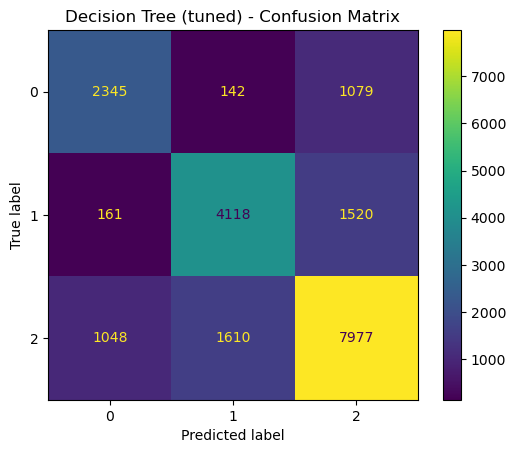

In [11]:
# ---- Evaluate best Decision Tree on test set ----
best_tree = grid_tree.best_estimator_
tree_results = evaluate_model("Decision Tree (tuned)", best_tree, X_test, y_test)


In [12]:
# ---- Random Forest: pipeline + param grid ----

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

pipe_rf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", rf_base),
    ]
)

param_grid_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__class_weight": [None, "balanced"],
}

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
)

grid_rf.fit(X_train, y_train)

print("Best params (Random Forest):", grid_rf.best_params_)
print("Best CV F1-macro (RF):", grid_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time= 3.9min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/credit/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time= 4.0min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time= 4.1min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time= 7.2min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time= 4.1min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time= 7.2min
[CV] END model__class_weight=None, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time= 7.3min
[CV] END model__class_weight=None, model__max_depth=None, 

=== Random Forest (tuned) ===
Accuracy: 0.772
F1 (macro): 0.7643443505859128

Classification report:

              precision    recall  f1-score   support

        Good       0.73      0.76      0.74      3566
        Poor       0.74      0.78      0.76      5799
    Standard       0.80      0.77      0.79     10635

    accuracy                           0.77     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.77      0.77      0.77     20000



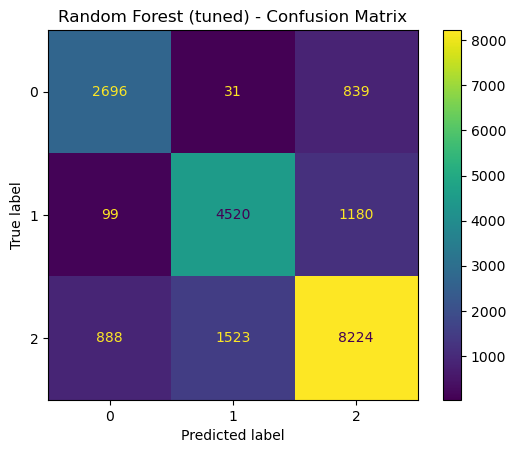

In [13]:
# ---- Evaluate best Random Forest on test set ----
best_rf = grid_rf.best_estimator_
rf_results = evaluate_model("Random Forest (tuned)", best_rf, X_test, y_test)


In [14]:
results_df = pd.DataFrame([logreg_results, tree_results, rf_results])
results_df.sort_values(by="f1_macro", ascending=False)


,model,accuracy,f1_macro
0,Logistic Regression (tuned),0.80525,0.801999
2,Random Forest (tuned),0.77200,0.764344
1,Decision Tree (tuned),0.72200,0.705555


In [15]:
all_results = [logreg_results, tree_results, rf_results]
best_entry = max(all_results, key=lambda x: x["f1_macro"])
best_label = best_entry["model"]

# map label -> actual estimator
label_to_model = {
    "Logistic Regression (tuned)": best_logreg,
    "Decision Tree (tuned)": best_tree,
    "Random Forest (tuned)": best_rf,
}

best_model = label_to_model[best_label]

joblib.dump(best_model, "../Dataset/best_model.pkl")
f"Saved best model: {best_label}"


'Saved best model: Logistic Regression (tuned)'